<a href="https://colab.research.google.com/github/SVJLucas/GraphMining/blob/main/1stDeliver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRAPH - Graph Mining - CS - PARIS - SACLAY (2023-2024)

## Professor: Nacéra Seghouani
### Students: Lucas J. Velôso  and Paul Canal

# Installing packages

In [96]:
%%capture
!pip uninstall python-louvain
!pip install -U python-louvain

# Downloading the Data

The dataset from Stanford's SNAP contains Facebook 'circles' or friends lists, featuring anonymized node profiles, circles, and ego networks collected via a Facebook app. With 4,039 nodes and 88,234 edges, it showcases detailed network dynamics including average clustering coefficients and the number of triangles. The anonymization process obscured feature interpretations, allowing for analysis of connections without revealing specific attributes like political affiliations. It's part of a study on discovering social circles in ego networks, referenced in a 2012 NIPS paper by McAuley and Leskovec.

## Downloading

In [2]:
import os

# Function to download a file using wget
def download_file(url: str, destination_folder: str) -> None:
    """
    Downloads a file from the specified URL into the destination folder using wget.

    Args:
        url: The URL of the file to download.
        destination_folder: The folder where the file should be saved.

    Returns:
        None
    """
    # Ensure the destination folder exists
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Construct the command to download the file
    command = f"wget -P {destination_folder} {url}"

    # Execute the download command
    os.system(command)
    print('Download completed successfully!!')

# Example usage
file_url = "http://snap.stanford.edu/data/facebook_combined.txt.gz"
destination = "/content/"

download_file(file_url, destination)


Download completed successfully!!


## Opening the .zip

In [3]:
import gzip
import os

def extract_gz_to_folder(gz_path: str, output_folder: str) -> None:
    """
    Extracts the contents of a .gz file and saves it to a specified folder.

    Args:
        gz_path: The file path of the .gz file to be extracted.
        output_folder: The folder path where the extracted file will be saved.

    Returns:
        None
    """
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the output file name based on the .gz file
    output_file_path = os.path.join(output_folder, os.path.basename(gz_path).replace('.gz', ''))

    # Open the .gz file and create a new file in the output folder
    with gzip.open(gz_path, 'rb') as gz_file:
        with open(output_file_path, 'wb') as output_file:
            # Copy the decompressed content to the new file
            output_file.write(gz_file.read())

    print('The .gz was read successfully!!')

extract_gz_to_folder('/content/facebook_data/facebook_combined.txt.gz', '/content/data')


The .gz was read successfully!!


# Opening the data

In [4]:
import networkx as nx

def create_graph_from_txt(filepath: str, num_nodes_to_consider: int) -> nx.Graph:
    """
    Reads a text file with edge list and creates a graph using NetworkX, considering only nodes up to a specified number.

    Args:
        filepath: The path to the text file containing the edge list.
        num_nodes_to_consider: The maximum node number to include in the graph.

    Returns:
        A NetworkX graph object created from the edge list in the text file, considering only the specified nodes.
    """
    # Create a new graph
    G = nx.Graph()

    # Open the text file and read lines
    with open(filepath, 'r') as file:
        for line in file:
            # Split each line into source and target node
            source, target = map(int, line.strip().split())
            # Check if both nodes are within the specified limit
            if source <= num_nodes_to_consider and target <= num_nodes_to_consider:
                # Add edge to the graph
                G.add_edge(source, target)

    return G

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(G: nx.Graph) -> None:
    """
    Plots a NetworkX graph.

    Args:
        G: A NetworkX graph object.

    Returns:
        None
    """
    # Draw the graph
    nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=15)

    # Show the plot
    plt.show()



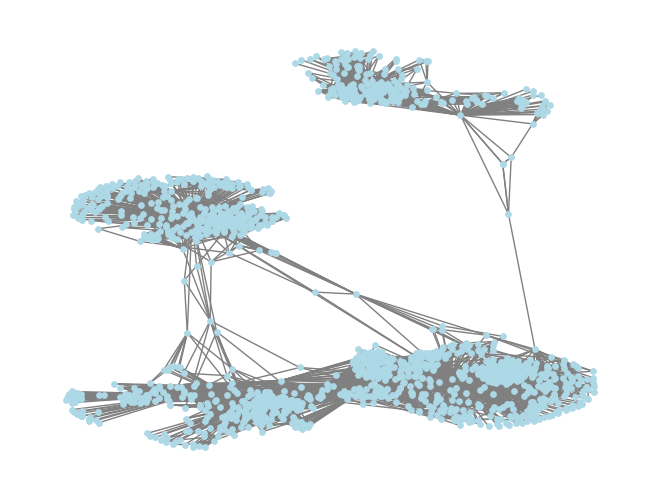

In [6]:
graph = create_graph_from_txt('/content/data/facebook_combined.txt', num_nodes_to_consider=1500)
plot_graph(graph)

# First Centrality Analysis



In [97]:
import numpy as np

def sigmoid(x: float) -> float:
    """
    Sigmoid function for normalization.

    Args:
        x: The input value.

    Returns:
        The sigmoid of x.
    """
    return 1 / (1 + np.exp(-x))

def plot_graph_centrality(graph: nx.Graph, centrality: dict, title: str, max_node_size: float = 150, min_node_size: float = 1, cmap=plt.cm.viridis, edge_alpha: float = 0.5, node_alpha: float = 0.9, layout_seed = 2024) -> None:
    """
    Plots the graph with nodes colored according to their centrality values, and sizes adjusted by a sigmoid function.
    Allows for separate transparency settings for nodes and edges.

    Args:
        graph: The graph to be plotted.
        centrality: A dictionary with nodes as keys and centrality values as values.
        title: The title for the plot.
        max_node_size: maximum node size.
        min_node_size: minimum node size.
        cmap: The colormap for node colors.
        edge_alpha: The transparency level for edges.
        node_alpha: The transparency level for nodes.
        layout_seed: The seed for the layout generation to ensure consistent positioning.

    Returns:
        None
    """
    # Normalize centrality values to lie between 0 and 1 for coloring
    max_centrality_value = max(centrality.values())
    centrality_normalized = {node: value / max_centrality_value for node, value in centrality.items()}

    # Generate colors for each node based on centrality
    node_colors = [centrality_normalized[node] for node in graph.nodes()]

    a = 2*(max_node_size-min_node_size)
    b = max_node_size-a
    node_sizes = [a * sigmoid(c / max_centrality_value) + b for c in centrality.values()]

    pos = nx.spring_layout(graph, seed=layout_seed)  # Positions for all nodes

    # Draw the graph with separate transparency for edges and nodes
    plt.figure(figsize=(10, 8))
    # Draw edges with specified edge transparency
    nx.draw_networkx_edges(graph, pos, alpha=edge_alpha, edge_color='gray')
    # Draw nodes with specified node transparency
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, cmap=cmap, alpha=node_alpha)

    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')
    plt.axis('off')  # Turn off the axis
    plt.show()


## Degree Analysis

<ipython-input-97-a0cdab63a18f>:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')


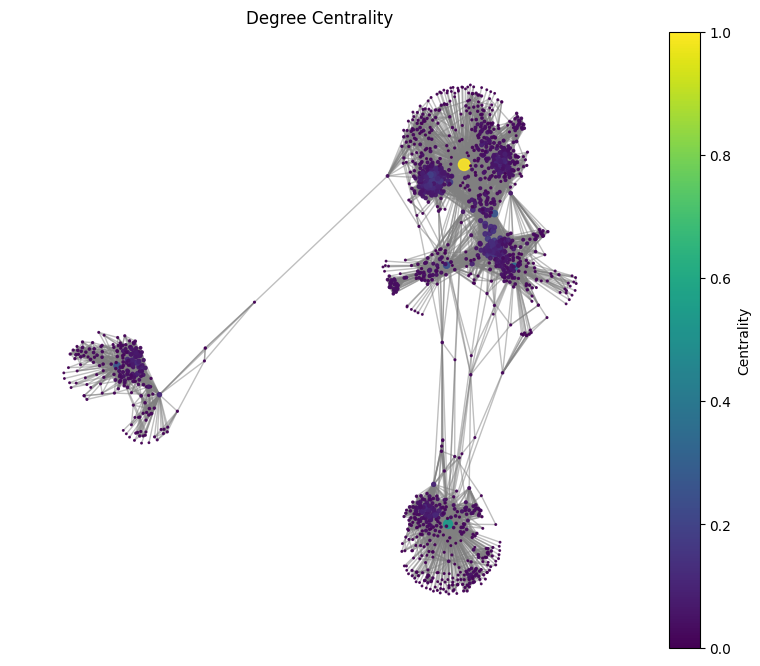

In [98]:
degree_centrality = nx.degree_centrality(graph)
plot_graph_centrality(graph, degree_centrality, 'Degree Centrality')

In the graph, we can see that each of the main clusters has a central node. In the graph, the sizes (radii) of the nodes are associated with the centrality value, and the greater the value of the centrality measure, in this case, the degree, the greater the size of the node.

## Neighborhood connectivity

<ipython-input-78-a0cdab63a18f>:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')


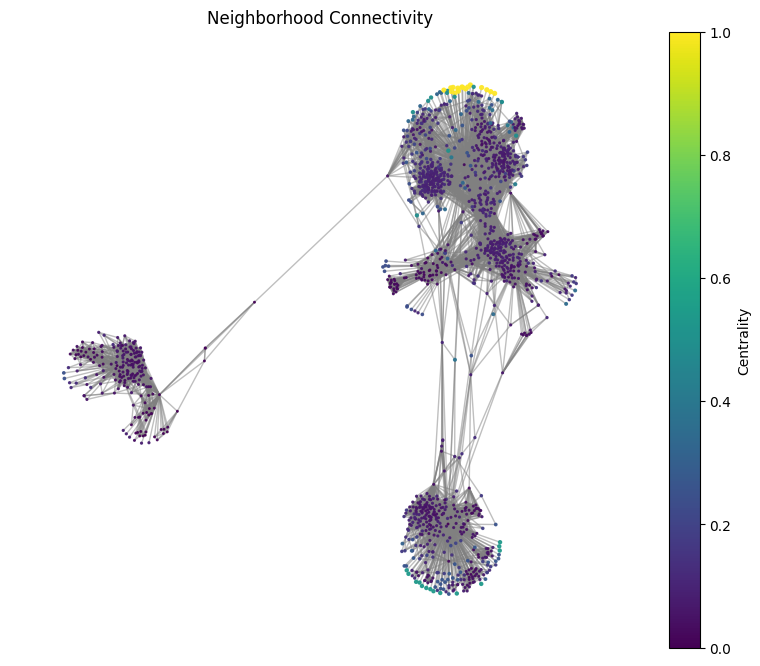

In [80]:
neighborhood_connectivity = nx.average_neighbor_degree(graph)
plot_graph_centrality(graph,neighborhood_connectivity, 'Neighborhood Connectivity', max_node_size=15)

## Eigenvector centrality


<ipython-input-78-a0cdab63a18f>:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')


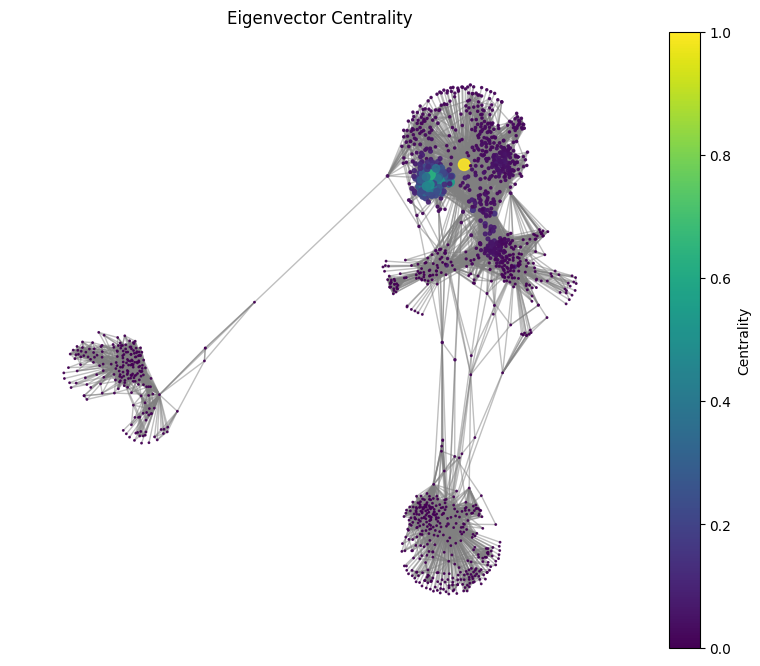

In [81]:
eigenvector_centrality = nx.eigenvector_centrality(graph)
plot_graph_centrality(graph, eigenvector_centrality, 'Eigenvector Centrality')

## PageRank Centrality


<ipython-input-78-a0cdab63a18f>:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')


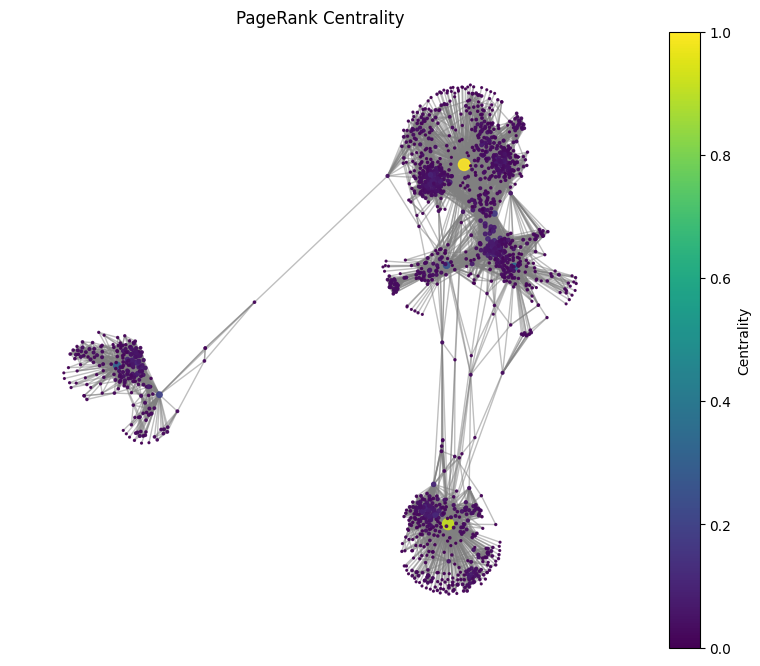

In [82]:
pagerank_centrality = nx.pagerank(graph)
plot_graph_centrality(graph, pagerank_centrality, 'PageRank Centrality')

Here we can observe the main nodes, those that are most likely to be visited, following the hypotheses of the Page Rank Algorithm.

## Clustering Coefficient Centrality

<ipython-input-78-a0cdab63a18f>:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')


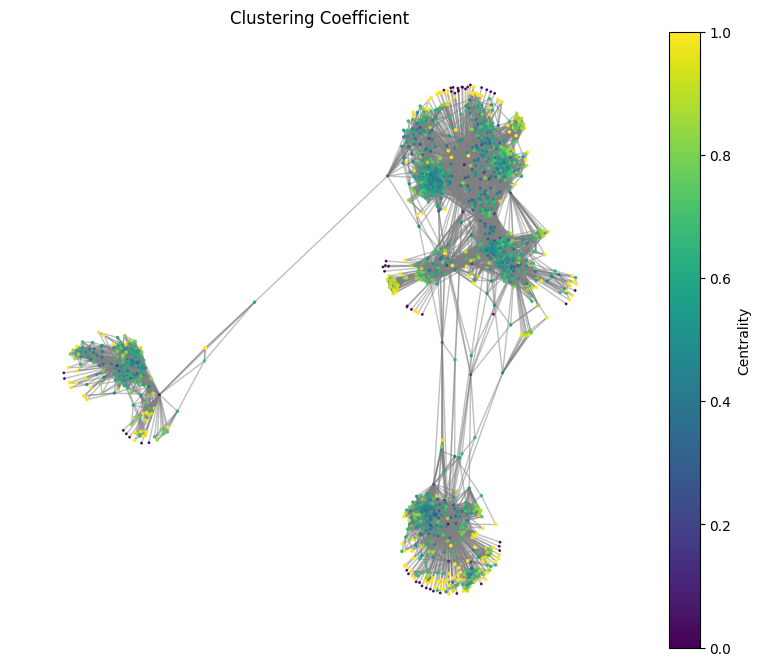

In [83]:
clustering_coefficient = nx.clustering(graph)
plot_graph_centrality(graph, clustering_coefficient, 'Clustering Coefficient',max_node_size=5)

## Closeness centrality

<ipython-input-78-a0cdab63a18f>:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Centrality')


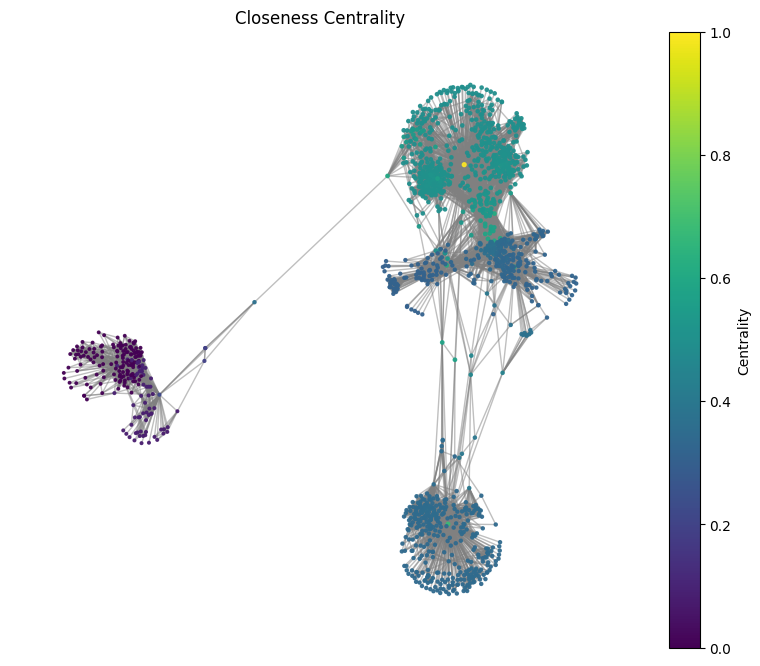

In [84]:
closeness_centrality = nx.closeness_centrality(graph)
plot_graph_centrality(graph, closeness_centrality, 'Closeness Centrality',max_node_size=15)

Here, interestingly, we can see that Closeness Centrality can map by creating certain clusters in the data.

# Community Detection

## k-Core Decomposition

 This algorithm identifies clusters based on the core level, where a k-core of a graph is a maximal connected subgraph in which all vertices have degree at least k. It's useful for understanding the graph's structure and identifying influential communities. Here, we Used it to simplify the graph analysis by peeling off layers of less connected nodes.

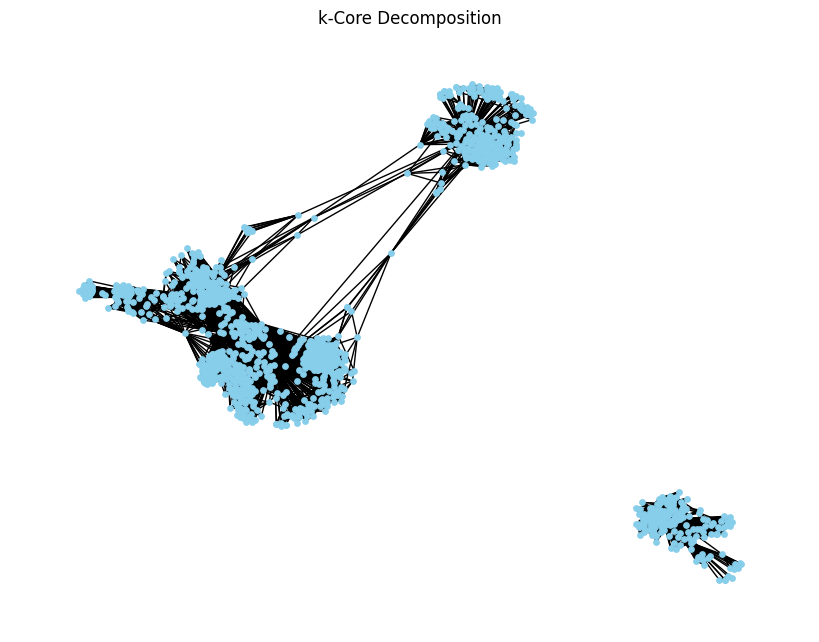

In [12]:
k_core = nx.k_core(graph, k=5)
plt.figure(figsize=(8, 6))
nx.draw(k_core, with_labels=False, node_color='skyblue', edge_color='k', node_size=15)
plt.title("k-Core Decomposition")
plt.show()

## Louvain Algorithm

This method aims to detect communities by maximizing modularity through a heuristic approach. It's an iterative process that aggregates nodes into communities at various scales. Here, we used due to its hierarchical clustering approach.

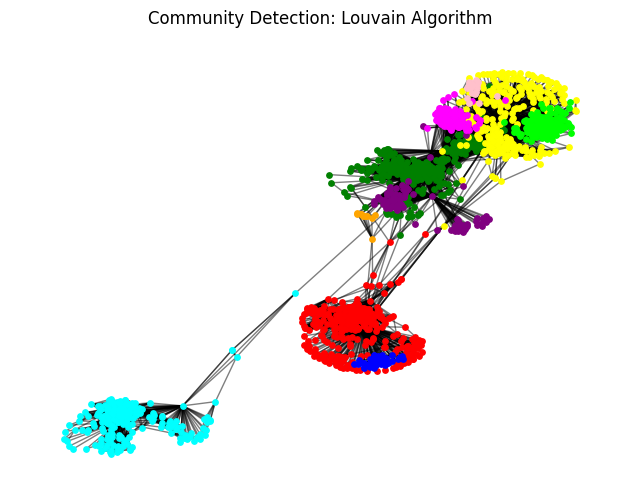

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

# Assuming 'graph' is already defined
# Compute the best partition
partition = community_louvain.best_partition(graph)

# Prepare the figure
plt.figure(figsize=(8, 6))

# Generate positions for all nodes
pos = nx.spring_layout(graph, seed=2024)

# Define your 15 named colors
colors = [
    'red', 'blue', 'green', 'yellow', 'orange',
    'purple', 'cyan', 'magenta', 'lime', 'pink',
    'teal', 'lavender', 'olive', 'brown', 'navy'
]

# Ensure we loop over communities and colors correctly
for i, comm in enumerate(set(partition.values())):
    # List of nodes in the current community
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == comm]
    # Draw nodes with the community-specific color
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size=15, node_color=colors[i % len(colors)])

# Draw the edges
nx.draw_networkx_edges(graph, pos, alpha=0.5)

# Set the title and show the plot
plt.title("Community Detection: Louvain Algorithm")
plt.axis('off')  # Optional: Hide the axes
plt.show()


## Girvan-Newman

In [89]:
from networkx.algorithms.community import girvan_newman


# Apply the Girvan-Newman algorithm
communities_generator = girvan_newman(graph)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

# Convert to list of sets
communities = sorted(map(sorted, next_level_communities))

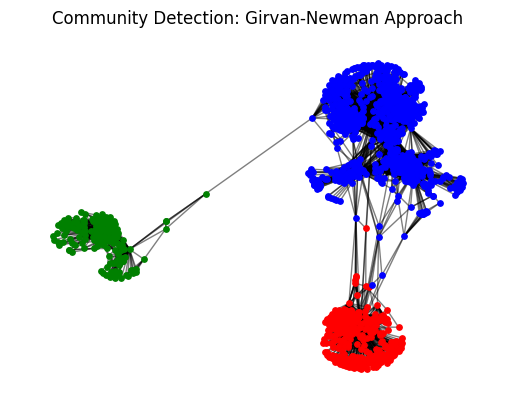

In [94]:

pos = nx.spring_layout(graph,seed=2024)  # Positions for all nodes

# Define colors for each community
colors = ['red', 'blue', 'green', 'yellow', 'orange']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(graph, pos, nodelist=community, node_size=15, node_color=colors[i % len(colors)])
nx.draw_networkx_edges(graph, pos, alpha=0.5)

plt.title("Community Detection: Girvan-Newman Approach")
plt.axis('off')
plt.show()
